In [1]:
#@author Y Ying
#modified from MATLAB answer key by Melissa Mai 
import pandas as pd
pd.set_option('display.max_rows', 10) # disable excessive df display
import numpy as np
import matplotlib.pyplot as plt # set plot style
plt.style.use('seaborn-bright')

Problem 1
==
Load in a file `data_prob2.dat`. It is xy data, column 1 is x, column 2 is y

In [2]:
df_xy = pd.read_csv("data_prob2.dat", delim_whitespace = True, header = None)
df_xy

,0,1
0,-3.654463,0.000317
1,-3.496679,0.000317
2,-3.338895,0.000317
3,-3.181111,0.000951
4,-3.023327,0.002535
...,...,...
45,3.445809,0.000951
46,3.603593,0.000317
47,3.761377,0.000000
48,3.919161,0.000000


What is the size of this? how many rows? how many columns?

In [3]:
print(df_xy.shape)
print(f"n_rows = {df_xy.shape[0]}; n_cols = {df_xy.shape[1]}")

(50, 2)
n_rows = 50; n_cols = 2


Rename column1 as `xvar`; rename column2 as `yvar`; multiply column2 by 2, name as `y2`

In [4]:
df_xy.columns = ["xvar", "yvar"]
df_xy["y2"] = df_xy["yvar"] * 2
df_xy

,xvar,yvar,y2
0,-3.654463,0.000317,0.000634
1,-3.496679,0.000317,0.000634
2,-3.338895,0.000317,0.000634
3,-3.181111,0.000951,0.001902
4,-3.023327,0.002535,0.005071
...,...,...,...
45,3.445809,0.000951,0.001902
46,3.603593,0.000317,0.000634
47,3.761377,0.000000,0.000000
48,3.919161,0.000000,0.000000


Plot `xvar` vs the new variable, `y2`.

Text(0, 0.5, 'y2')

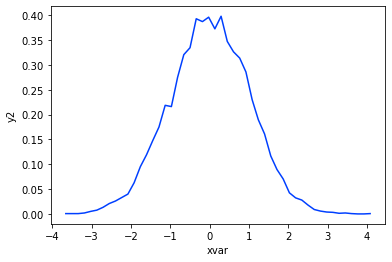

In [5]:
plt.plot(df_xy['xvar'], df_xy['y2'])
plt.xlabel("xvar")
plt.ylabel("y2")

Problem 2
=
Create a new function:
1. create a new script with the first line: `function[xValues, yValues]=calc_gauss(mu, sigma)` (Matlab)
2. define `xmin=mu-sigma*4`
3. define `xmax=mu+sigma*4`
4. define `nPts = 100`
5. define `dx=(xmax-xmin)/100`
6. create an array of `xValues` from `xmin` to `xmax`, at increments of `dx`
7. define the gaussian `f=1/sqrt(2*pi*sigma^2)*exp(-1/(2*sigma^2)*(x-mu)^2)`
8. return the `xValues` and `yValues` that were calculated in this function

In [6]:
def calc_gauss(mu, sigma):
    xmin = mu - sigma * 4
    xmax = mu + sigma * 4
    nPts = 100
    dx = (xmax - xmin)/100
    xValues = np.arange(xmin, xmax, dx)
    yValues = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-1/(2*sigma**2)*(xValues-mu)**2)
    return xValues, yValues

Problem 3
=
<h5>Note that for people doing this problem in python/julia, some did not have an external script of `calc_gauss` and import that external file; rather just using the internally defined function. I did not take points off, but if you are not sure how to import an external `.py` script, please make consult some external resources and try to get a hang of it.</h5>
To call a function that is defined externally, there are a few options. If the function is defined in a distinct file, and is in the same directory, you can call it. Alternatively, in MATLAB you can define the function at the bottom of the 'main' file that is calling it.  
1. open a new matlab script. You can also create libraries that contain function definitions, and then include or in python, import them. That is a bit more trouble, but can be worth it if you want to re-use the functions in many other programs. 
2. Create a for loop from 1:10, define `width= i*0.1`, so it increases as you iterate

3. Generate a gaussian using the calc_gauss function you wrote in problem 3. 

4. Use the same mean value mu for each iteration

5. Feed in the new width variable for sigma, so the variance keeps growing with each iteration of the for loop

6. plot x vs f for each value of sigma. Make sure that you "hold" the figure before you enter the for loop, so that each curve gets added on to the same figure.

7. It should look like a spectrum of normal distributions that keep getting wider and lower. 

8. label x-axis `x`

9. label y-axis `p(x)`

10. change the fontsize to 40

11. After adding all the curves, save the figure using the saveas command to a file named 'myGaussians.eps'



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


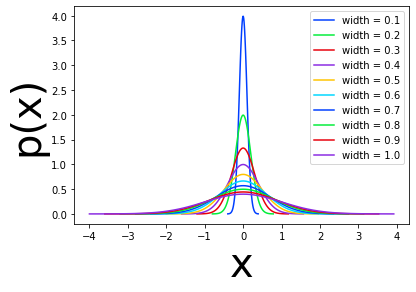

In [7]:
import hw1_function
for i in range(1, 11):
    width = i*0.1
    mu = 0
    x, y = hw1_function.calc_gauss(mu, width)
    plt.plot(x, y, label = ("width = %.1f"%width))
    
plt.legend()
plt.xlabel("x", fontsize = 40)
plt.ylabel("p(x)", fontsize = 40)
plt.savefig('myGaussians.eps')

Problem 4
=
1. create a meshgrid of x values from -5 to +5, and y values from -10 to +10

2. define a function on this grid Z=X^2*cos(X)-Y^2;

3. create a surface plot of Z vs X and Y

4. hold this plot and add a contour plot of Z vs X and Y

In [8]:
# create a meshgrid of x values from -5 to +5, and y values from -10 to +10
x = np.arange(-5, 5, 0.1)
y = np.arange(-10, 10, 0.1)
xv, yv = np.meshgrid(x, y)

In [9]:
# define a function on this grid Z=X^2*cos(X)-Y^2
def calculate_z(xv, yv):
    zv = xv**2 * np.cos(xv) - yv**2
    return zv

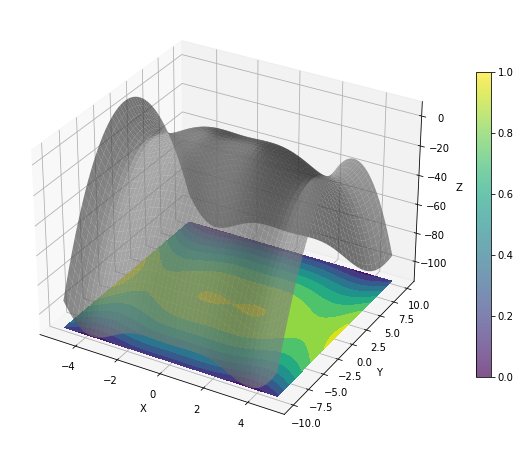

In [10]:
zv = calculate_z(xv, yv)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

# create a surface plot of Z vs X and Y
surf = ax.plot_surface(xv, yv, zv, color = "grey", alpha = 0.67)
# hold this plot and add a contour plot of Z vs X and Y
cset = ax.contourf(xv, yv, zv, zdir='z', offset=np.min(zv))

fig.colorbar(surf, ax=ax, shrink = 0.7)

ax.set_xlabel("X")
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Problem 5
=
1. Load `datapts3.dat` file, what is the size of the array?

2. calculate the mean of the data pts

3. calculate the standard deviation of the data pts

4. calculate the standard error of the mean (SEM) for the first 10 data points. SEM is the sample standard deviation divided by the square root of the sample size.

5. calculate the mean of the first 10 data points

6. create an array that stores the number of data points you just sampled. (i.e. `npts(1)=10`)

7. create an array to store the SEM you just calculated (i.e. `semvec(1)=..`) and another for the mean `mymeanvec(1)=..`)


8. calculate the standard error of the mean for the first 100 data points.

9. store these as the next entries in your datapoints array and SEM array

10. repeat for the first 200 and 1000 datapoints

11. make an errorplot of the mean as a function of number of datapoints, with the SEM used as the size of the bars

In [11]:
df_datapts3 = pd.read_csv("datapts3.dat", delim_whitespace = True, header = None)
arr_datapts3 = np.array(df_datapts3)
print(f"size = {len(arr_datapts3)}")
print(f"mean = {np.mean(arr_datapts3)}")
print(f"stdev = {np.std(arr_datapts3)}")

size = 1000
mean = 0.19109971074810003
stdev = 5.713500704915071


In [12]:
npts = np.empty(0)
semvec = np.empty(0)
meanvec = np.empty(0)

nptvec = [10, 100, 200, 1000]

for npt in nptvec:
    
    npts = np.append(npts, npt)
    
    sem = np.std(arr_datapts3[:npt])/np.sqrt(npt)
    print(f"SEM of {npt} data points = {sem}")
    semvec = np.append(semvec, sem)
    
    mean = np.mean(arr_datapts3[:npt])
    print(f"mean of {npt} data points = {mean}")
    meanvec = np.append(meanvec, mean)

SEM of 10 data points = 1.6128995334814344
mean of 10 data points = -1.577669259
SEM of 100 data points = 0.5633839763274548
mean of 100 data points = -0.0883442545999999
SEM of 200 data points = 0.40804180692611597
mean of 200 data points = 0.79701464274
SEM of 1000 data points = 0.18067675640509218
mean of 1000 data points = 0.19109971074810003


Text(0, 0.5, 'mean')

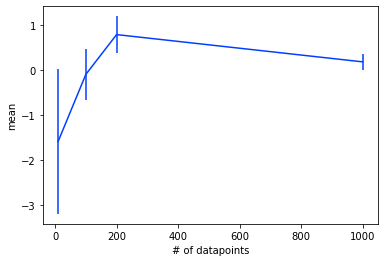

In [13]:
plt.errorbar(npts, meanvec, yerr=semvec)
plt.xlabel("# of datapoints")
plt.ylabel("mean")

Problem 6
=


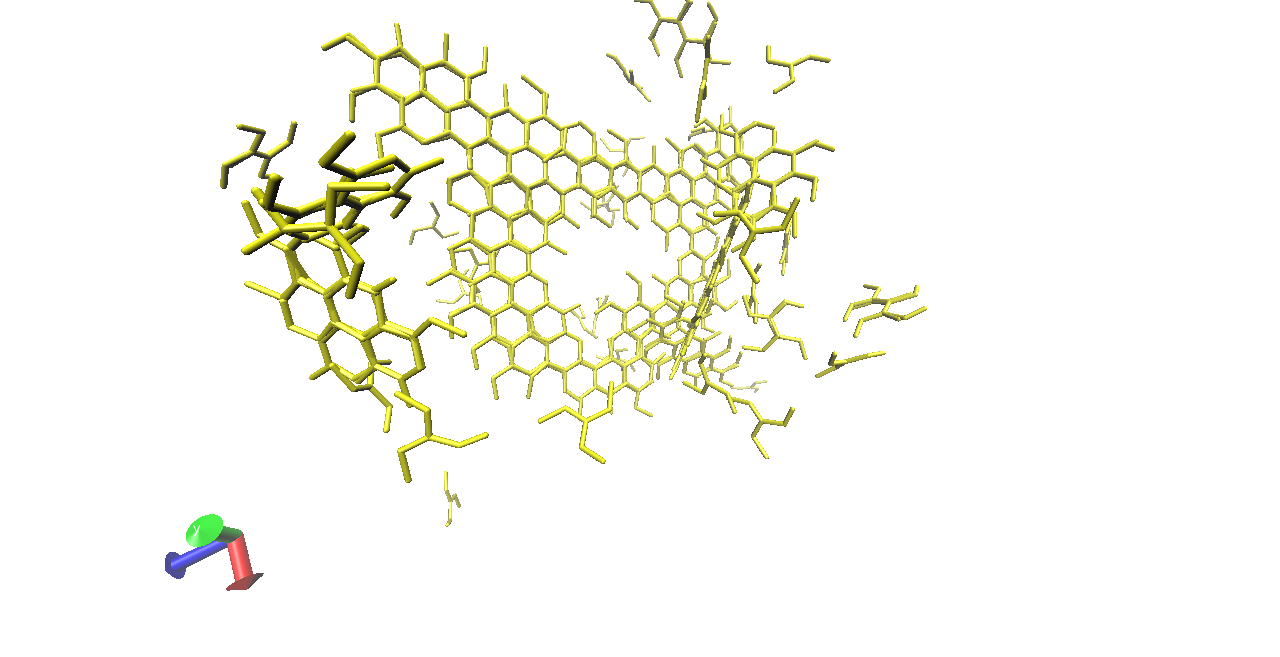

In [14]:
from IPython.display import Image
Image(filename='clathrin.png') 

Problem 7
=

In [15]:
#large mitochondria looks like it has 4 legs, each is approx. cylindrical,
#radius of 0.25um, length of 5um. 
#V is 4*pi*r^2*h=3.9um^3
#SA is caps: 4*pi*r^2 plus legs: 4*2*pi*r*h=32um^2
#Small mitochondria is about same radius, but legs are half as long (h/2)
#so it has half the volume and ~half the SA.
#So on average, the mitochondria have a V=3um^3 and SA=24.25um^2